<a href="https://colab.research.google.com/github/jlandesman/jlandesman.github.io/blob/master/_notebooks/Tidy_Tuesday_Passwords_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing Jekyll

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
URL = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-14/passwords.csv'
df = pd.read_csv(URL)
df.head()

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0


# Standard Data Cleaning



In [0]:
df.apply(lambda x: x.isnull().sum())

rank                 7
password             7
category             7
value                7
time_unit            7
offline_crack_sec    7
rank_alt             7
strength             7
font_size            7
dtype: int64

In [0]:
df[df['rank'].isnull()]

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.dropna(how='all',axis=0, inplace=True)

In [0]:
df.isnull().sum()

rank                 0
password             0
category             0
value                0
time_unit            0
offline_crack_sec    0
rank_alt             0
strength             0
font_size            0
dtype: int64

## Basic Exploration

In [0]:
df.columns

Index(['rank', 'password', 'category', 'value', 'time_unit',
       'offline_crack_sec', 'rank_alt', 'strength', 'font_size'],
      dtype='object')

In [0]:
df['category'].value_counts()

name                   183
cool-macho              79
simple-alphanumeric     61
fluffy                  44
sport                   37
nerdy-pop               30
animal                  29
password-related        15
food                    11
rebellious-rude         11
Name: category, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb047b097b8>,
      dtype=object)

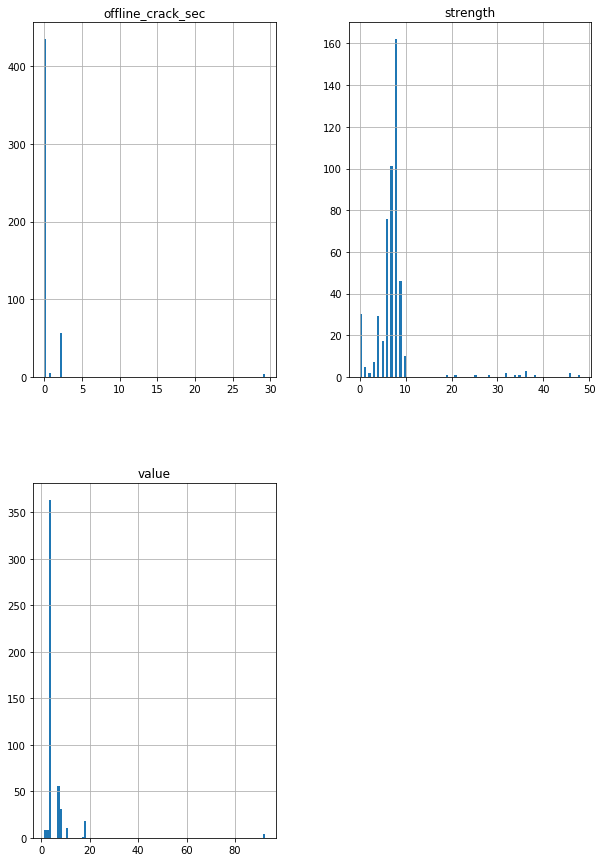

In [0]:
df[['offline_crack_sec','strength','value']].hist(figsize=(10,15), bins=100)

In [0]:
df.loc[df['offline_crack_sec'] == df['offline_crack_sec'].max()]

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
405,406.0,jordan23,sport,92.27,years,29.27,407.0,34.0,23.0


In [0]:
top_10 = pd.DataFrame(df.groupby('category').
                      apply(lambda x: x.sort_values('rank')['password'].tail(10))).reset_index()
top_10.columns = ['category','rank','password']
top_10

,category,rank,password
0,animal,347,beaver
1,animal,355,scorpion
2,animal,356,doggie
3,animal,363,birdie
4,animal,370,animal
...,...,...,...
95,sport,416,broncos
96,sport,443,cricket
97,sport,446,racing
98,sport,449,redwings


In [0]:
top_10.sort_values(['category','rank'], inplace=True)
top_10['num_rank'] = np.tile(np.arange(1,11), top_10['category'].nunique())
top_10.head()

,category,rank,password,num_rank
0,animal,347,beaver,1
1,animal,355,scorpion,2
2,animal,356,doggie,3
3,animal,363,birdie,4
4,animal,370,animal,5


In [0]:
top_10.pivot(index='num_rank',columns='category',values='password')

category,animal,cool-macho,fluffy,food,name,nerdy-pop,password-related,rebellious-rude,simple-alphanumeric,sport
num_rank,,,,,,,,,,
1,beaver,police,baby,cheese,mexico,ou812,gateway,freedom,123321,yankee
2,scorpion,therock,private,coffee,fantasy,topgun,please,secret,999999,blazer
3,doggie,magnum,little,banana,ford,saturn,welcome,whatever,qwert,runner
4,birdie,nothing,kitten,butter,gibson,online,internet,badboy,1313,bronco
5,animal,speedy,super,muffin,marcus,dexter,enter,sexsex,87654321,jordan23
6,elephant,playboy,white,hotdog,cassie,trinity,helpme,butthead,333333,broncos
7,wolf,pumpkin,sweet,apples,natasha,digital,pookie,booger,123abc,cricket
8,donkey,sniper,dreams,cocacola,chance,beatles,testing,stupid,xxxx,racing
9,buffalo,hotrod,kitty,apple,alexande,genesis,tester,horny,test123,redwings


In [0]:
df.sort_values('strength').tail()

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
358,359.0,ou812,nerdy-pop,17.28,hours,0.000622,360.0,36.0,24.0
320,321.0,bond007,nerdy-pop,2.56,years,0.806000,322.0,38.0,25.0
148,149.0,ncc1701,nerdy-pop,2.56,years,0.806000,149.0,46.0,27.0
196,197.0,thx1138,nerdy-pop,2.56,years,0.806000,198.0,46.0,27.0
335,336.0,rush2112,nerdy-pop,92.27,years,29.020000,337.0,48.0,28.0
